In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install statsmodels
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5-years-vietnamese-stock-data/stock_data_raw1 - stock_data_raw1.csv


In [2]:
df = pd.read_csv("/kaggle/input/5-years-vietnamese-stock-data/stock_data_raw1 - stock_data_raw1.csv")
df.head(10)

,ticker,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice,Label,symbol,en_icb_name3
0,HTI,2023,4,2023-12-29,0.0000,0.8947,7.5299,0.0925,0.3891,0.1260,0.0000,0.0000,572.8812,0.0000,14.98,0.00875,Bad,HTI,Construction & Materials
1,HTI,2023,3,2023-09-29,0.2932,0.8767,7.2049,0.0973,0.4332,0.1302,0.1246,0.0381,577.3878,2.1943,14.85,-0.02687,Bad,HTI,Construction & Materials
2,HTI,2023,2,2023-06-30,0.2903,0.8991,7.2384,0.0979,0.4354,0.1335,0.1239,0.0376,593.1495,2.2770,15.26,0.06193,Good,HTI,Construction & Materials
3,HTI,2023,1,2023-03-31,0.0000,0.9074,7.5228,0.0955,0.4665,0.1310,0.0000,0.0000,554.0819,0.0000,14.37,0.02863,Good,HTI,Construction & Materials
4,HTI,2022,4,2022-12-29,0.0000,0.9383,7.5819,0.1071,0.4182,0.1248,0.0000,0.0000,558.5430,0.0000,13.97,0.05514,Good,HTI,Construction & Materials
5,HTI,2022,3,2022-09-29,0.2744,0.9075,6.7334,0.1081,0.4324,0.1291,0.1309,0.0402,553.0219,2.2824,13.24,0.00838,Bad,HTI,Construction & Materials
6,HTI,2022,2,2022-06-30,0.2143,0.8217,11.5597,0.1118,0.4586,0.1346,0.0744,0.0224,560.9125,2.1190,13.13,-0.10802,Bad,HTI,Construction & Materials
7,HTI,2022,1,2022-03-31,0.2153,0.9121,12.2930,0.1034,0.4842,0.1346,0.0759,0.0225,543.3124,2.2533,14.72,0.04993,Good,HTI,Construction & Materials
8,HTI,2021,4,2021-12-29,0.2078,1.0738,13.7205,0.1005,0.5083,0.1866,0.0790,0.0225,815.5024,2.3653,14.02,-0.00214,Bad,HTI,Construction & Materials
9,HTI,2021,3,2021-09-29,0.2025,1.0385,14.4385,0.1087,0.5885,-0.6981,0.0690,0.0197,-526.9592,2.5745,14.05,0.13765,Good,HTI,Construction & Materials


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   4845 non-null   object 
 1   yearReport               4845 non-null   int64  
 2   lengthReport             4845 non-null   int64  
 3   time                     4845 non-null   object 
 4   Asset Turnover           4845 non-null   float64
 5   P/B                      4845 non-null   float64
 6   P/E                      4845 non-null   float64
 7   Dividend yield (%)       4845 non-null   float64
 8   Gross Profit Margin (%)  4845 non-null   float64
 9   Net Profit Margin (%)    4845 non-null   float64
 10  ROE (%)                  4845 non-null   float64
 11  ROA (%)                  4845 non-null   float64
 12  EPS (VND)                4845 non-null   float64
 13  Debt/Equity              4845 non-null   float64
 14  close                   

In [4]:
df['time']=pd.to_datetime(df['time'])
df.head()

,ticker,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice,Label,symbol,en_icb_name3
0,HTI,2023,4,2023-12-29,0.0000,0.8947,7.5299,0.0925,0.3891,0.1260,0.0000,0.0000,572.8812,0.0000,14.98,0.00875,Bad,HTI,Construction & Materials
1,HTI,2023,3,2023-09-29,0.2932,0.8767,7.2049,0.0973,0.4332,0.1302,0.1246,0.0381,577.3878,2.1943,14.85,-0.02687,Bad,HTI,Construction & Materials
2,HTI,2023,2,2023-06-30,0.2903,0.8991,7.2384,0.0979,0.4354,0.1335,0.1239,0.0376,593.1495,2.2770,15.26,0.06193,Good,HTI,Construction & Materials
3,HTI,2023,1,2023-03-31,0.0000,0.9074,7.5228,0.0955,0.4665,0.1310,0.0000,0.0000,554.0819,0.0000,14.37,0.02863,Good,HTI,Construction & Materials
4,HTI,2022,4,2022-12-29,0.0000,0.9383,7.5819,0.1071,0.4182,0.1248,0.0000,0.0000,558.5430,0.0000,13.97,0.05514,Good,HTI,Construction & Materials


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticker                   4845 non-null   object        
 1   yearReport               4845 non-null   int64         
 2   lengthReport             4845 non-null   int64         
 3   time                     4845 non-null   datetime64[ns]
 4   Asset Turnover           4845 non-null   float64       
 5   P/B                      4845 non-null   float64       
 6   P/E                      4845 non-null   float64       
 7   Dividend yield (%)       4845 non-null   float64       
 8   Gross Profit Margin (%)  4845 non-null   float64       
 9   Net Profit Margin (%)    4845 non-null   float64       
 10  ROE (%)                  4845 non-null   float64       
 11  ROA (%)                  4845 non-null   float64       
 12  EPS (VND)                4845 non-

In [6]:
df.describe()

,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice
count,4845.000000,4845.000000,4845,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000
mean,2021.105263,2.578947,2021-09-28 15:09:28.421052672,1.010517,1.426695,31.279508,0.067816,0.197804,0.159858,0.077390,0.054741,528.838517,1.317036,18.664376,0.058756
min,2019.000000,1.000000,2019-06-28 00:00:00,-0.143300,0.000000,-21844.720700,0.000000,-20.606700,-149.811100,-54.706500,-0.869300,-8572.099300,-420.486900,0.200000,-0.970150
25%,2020.000000,2.000000,2020-06-30 00:00:00,0.284300,0.688100,5.999400,0.000000,0.081200,0.009700,0.025800,0.010600,46.601400,0.355800,7.550000,-0.082790
50%,2021.000000,3.000000,2021-09-29 00:00:00,0.745900,1.086300,9.921800,0.030000,0.168000,0.048900,0.090700,0.043000,300.547600,0.871900,12.800000,0.011200
75%,2022.000000,4.000000,2022-12-29 00:00:00,1.306400,1.715500,18.499700,0.064900,0.313000,0.147400,0.169100,0.088200,805.467200,1.701800,23.420000,0.147990
max,2023.000000,4.000000,2023-12-29 00:00:00,14.993800,60.007300,24867.867200,9.000000,3.191800,181.674600,0.772200,0.615800,22940.807100,162.307900,288.200000,6.500000
std,1.372605,1.091504,NaN,1.164654,1.675737,558.115694,0.461240,0.468146,5.343487,0.836223,0.078941,1045.862246,7.421476,18.416068,0.310207


<Axes: xlabel='Label', ylabel='count'>

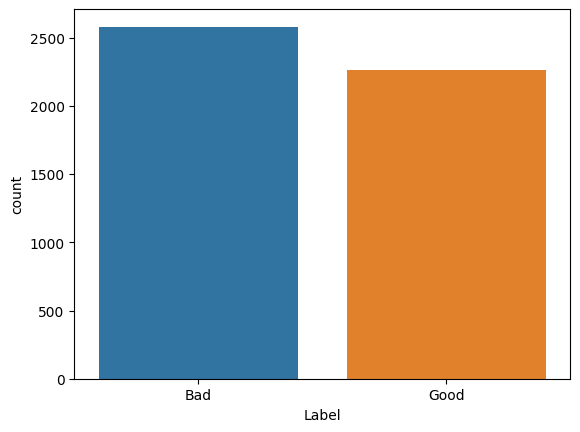

In [7]:
sns.countplot(x=df['Label'])

<Axes: xlabel='yearReport', ylabel='count'>

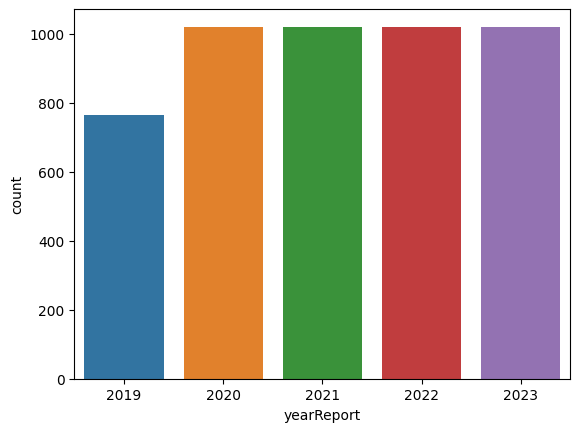

In [8]:
sns.countplot(x=df['yearReport'])

<Axes: xlabel='count', ylabel='en_icb_name3'>

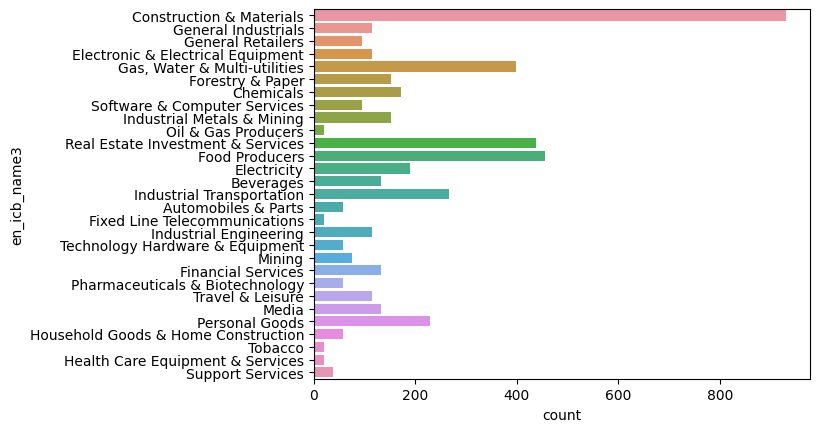

In [9]:
sns.countplot(y=df['en_icb_name3'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Asset Turnover', ylabel='Count'>

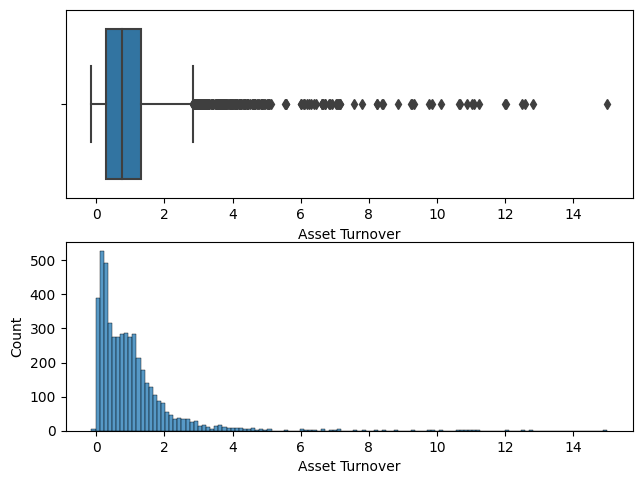

In [10]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Asset Turnover'],ax = axes[0])
sns.histplot(x=df['Asset Turnover'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/B', ylabel='Count'>

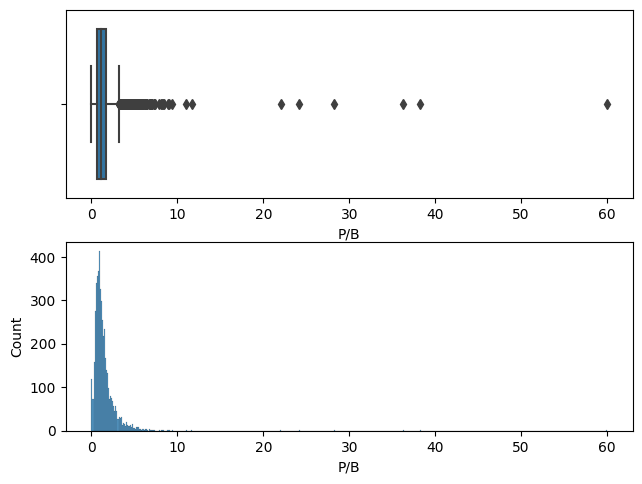

In [11]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/B'],ax = axes[0])
sns.histplot(x=df['P/B'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/E', ylabel='Count'>

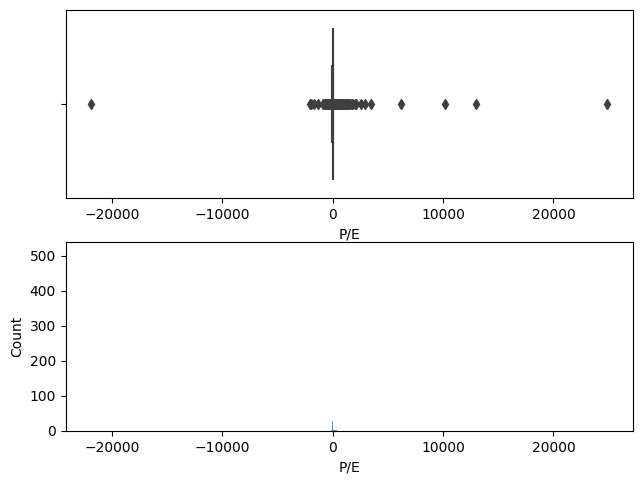

In [12]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/E'],ax = axes[0])
sns.histplot(x=df['P/E'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Dividend yield (%)', ylabel='Count'>

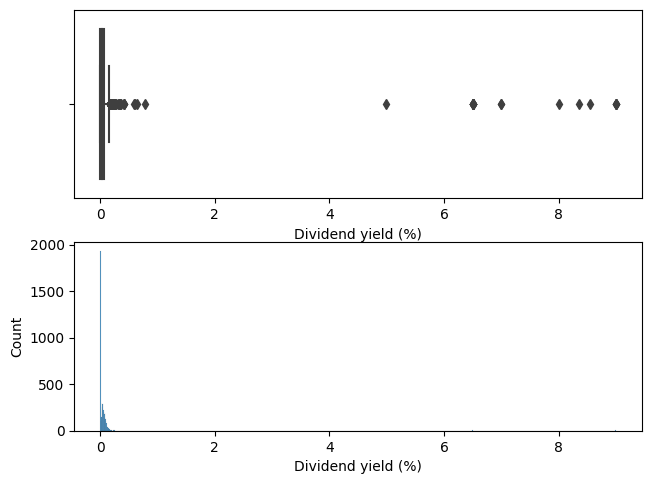

In [13]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Dividend yield (%)'],ax = axes[0])
sns.histplot(x=df['Dividend yield (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gross Profit Margin (%)', ylabel='Count'>

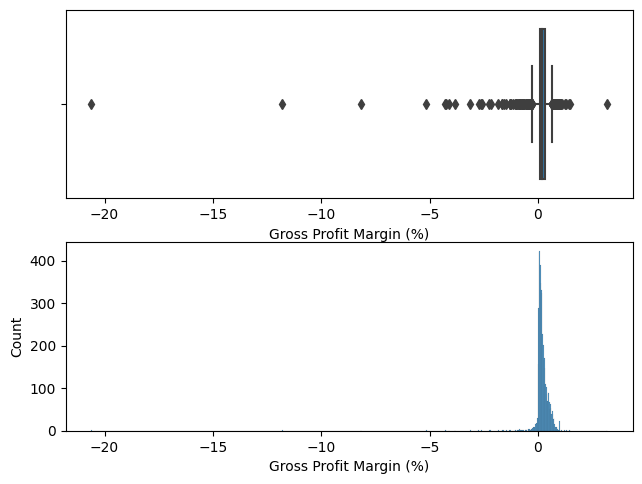

In [14]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Gross Profit Margin (%)'],ax = axes[0])
sns.histplot(x=df['Gross Profit Margin (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Net Profit Margin (%)', ylabel='Count'>

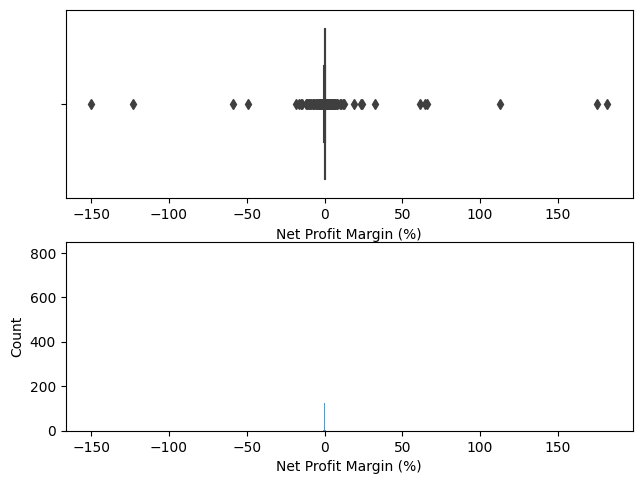

In [15]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Net Profit Margin (%)'],ax = axes[0])
sns.histplot(x=df['Net Profit Margin (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ROE (%)', ylabel='Count'>

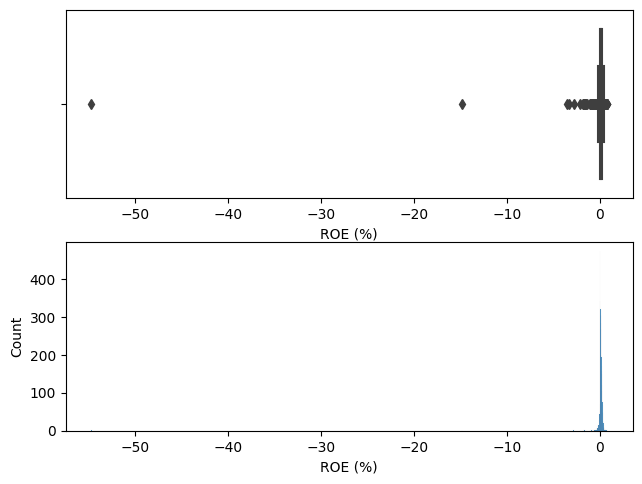

In [16]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['ROE (%)'],ax = axes[0])
sns.histplot(x=df['ROE (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ROA (%)', ylabel='Count'>

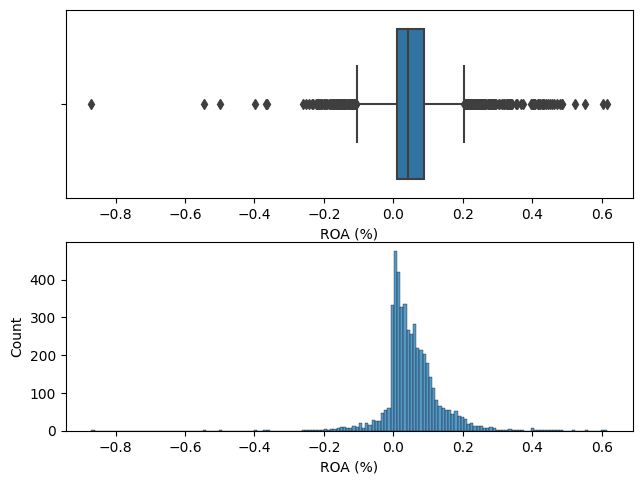

In [17]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['ROA (%)'],ax = axes[0])
sns.histplot(x=df['ROA (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/E', ylabel='Count'>

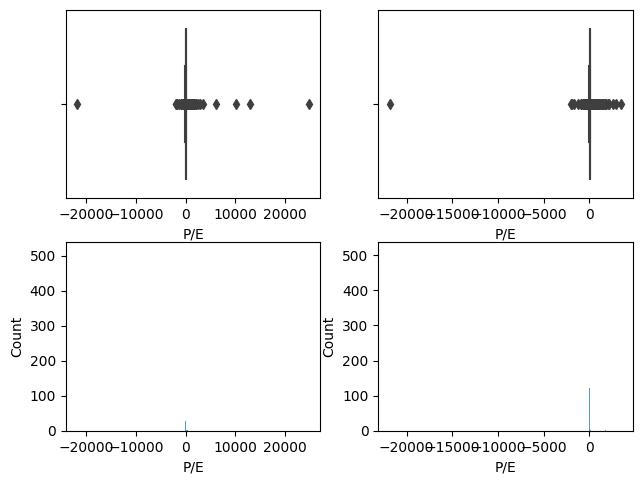

In [18]:
fig, axes = plt.subplots(2,2)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/E'],ax = axes[0,0])
sns.boxplot(x=df[df['P/E'] < 5000]['P/E'],ax = axes[0,1])
sns.histplot(x=df['P/E'],ax = axes[1,0])
sns.histplot(x=df[df['P/E'] < 5000]['P/E'],ax = axes[1,1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EPS (VND)', ylabel='Count'>

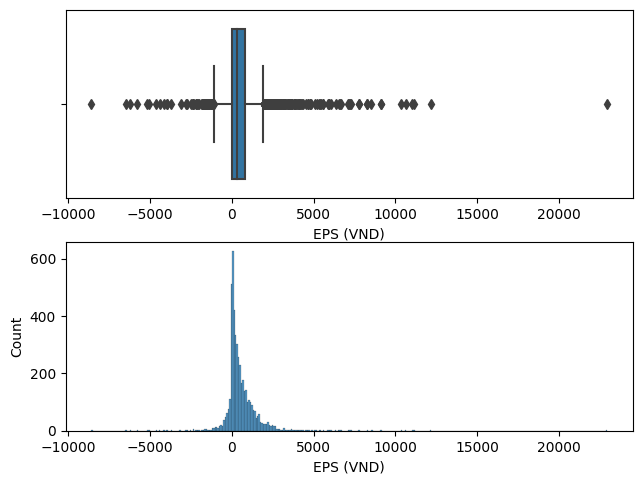

In [19]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['EPS (VND)'],ax = axes[0])
sns.histplot(x=df['EPS (VND)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Debt/Equity', ylabel='Count'>

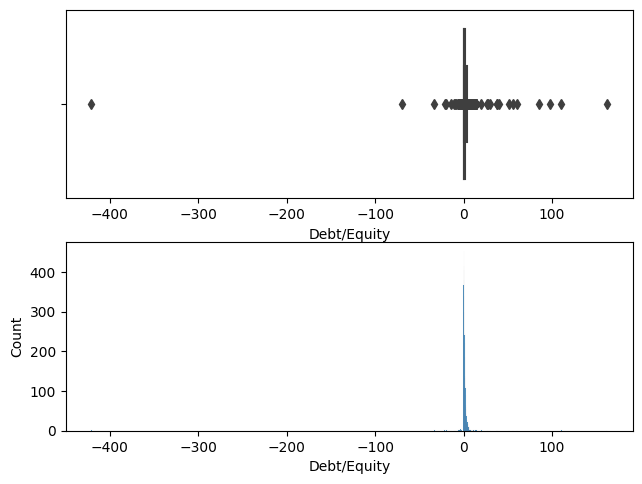

In [20]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Debt/Equity'],ax = axes[0])
sns.histplot(x=df['Debt/Equity'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='QuarterPrice', ylabel='Count'>

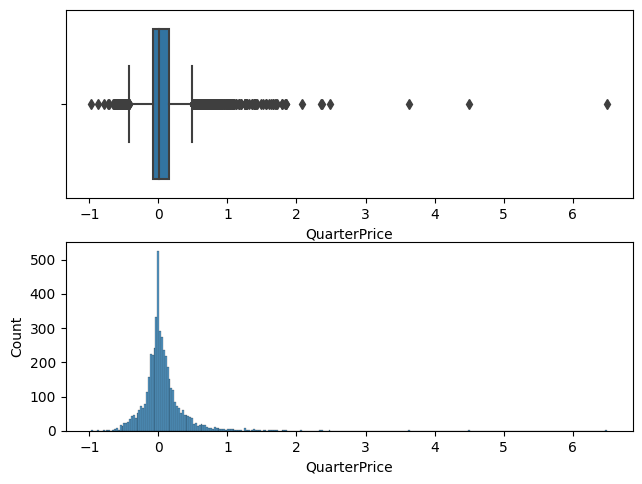

In [21]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['QuarterPrice'],ax = axes[0])
sns.histplot(x=df['QuarterPrice'],ax = axes[1])

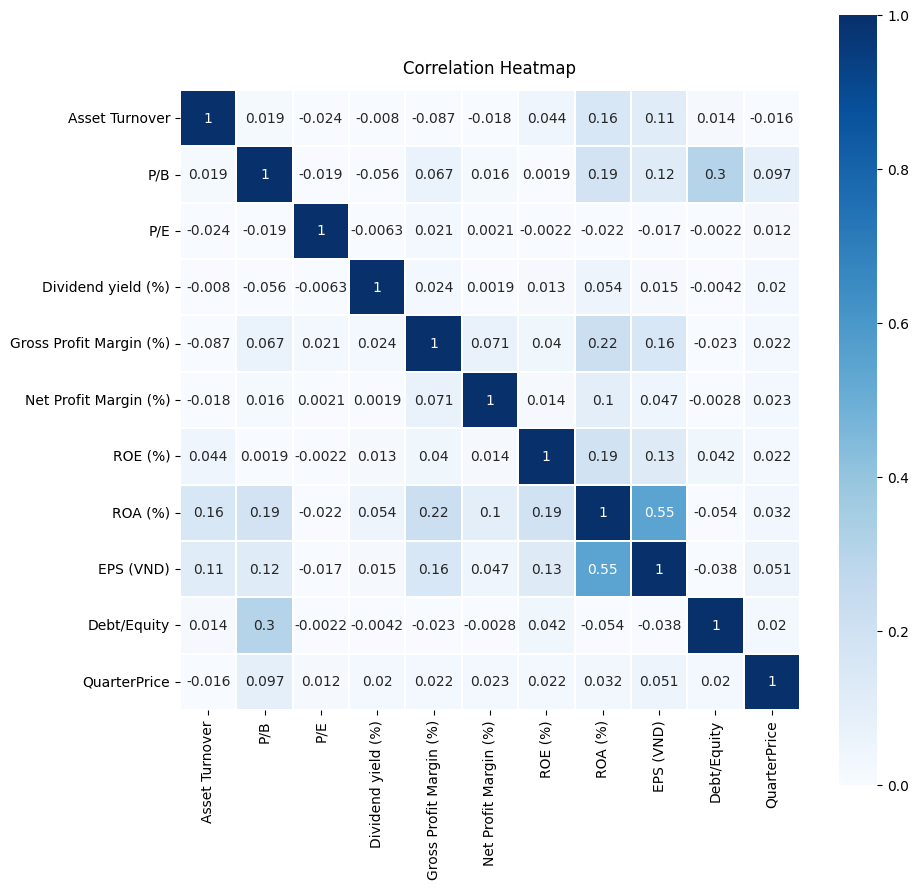

In [23]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.loc[:,'Asset Turnover':'QuarterPrice'].drop(columns=['close']).corr(),linewidths=0.1,vmax=1.0,vmin=0, 
            square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='QuarterPrice', ylabel='ROA (%)'>

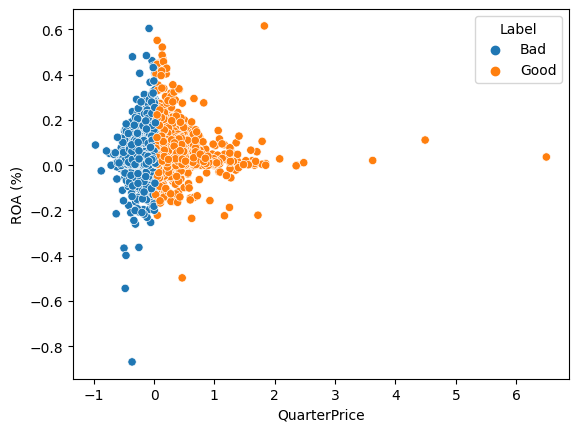

In [24]:
sns.scatterplot(x=df['QuarterPrice'],y=df['ROA (%)'] , hue=df['Label'])

In [25]:
from scipy import stats
stats.spearmanr(df['QuarterPrice'],df['ROA (%)'])

SignificanceResult(statistic=0.09758057501099549, pvalue=9.986768937185108e-12)

<Axes: xlabel='QuarterPrice', ylabel='EPS (VND)'>

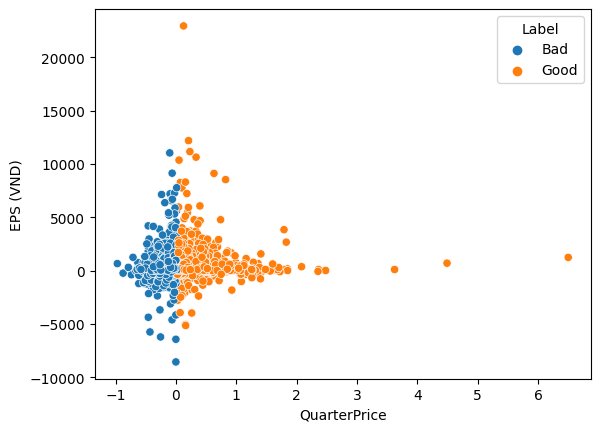

In [26]:
sns.scatterplot(x=df['QuarterPrice'],y=df["EPS (VND)"] , hue=df['Label'])

In [27]:
stats.spearmanr(df['QuarterPrice'],df["EPS (VND)"])

SignificanceResult(statistic=0.11370178182265882, pvalue=2.0539813698603425e-15)

<Axes: xlabel='P/B', ylabel='Debt/Equity'>

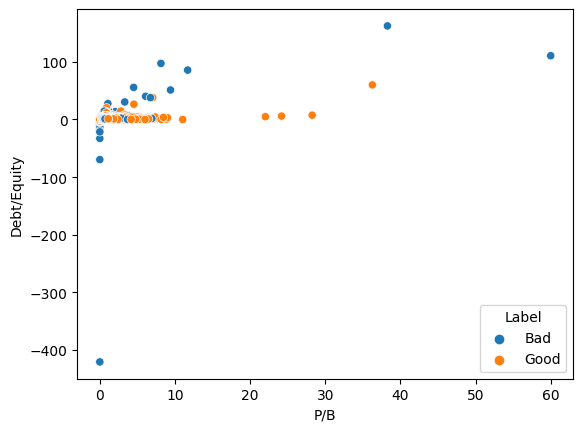

In [28]:
sns.scatterplot(x=df['P/B'],y=df['Debt/Equity'], hue=df['Label'])

In [29]:
stats.spearmanr(df['P/B'],df['Debt/Equity'])

SignificanceResult(statistic=0.033342771980907925, pvalue=0.020291995335655167)

<Axes: xlabel='ROA (%)', ylabel='EPS (VND)'>

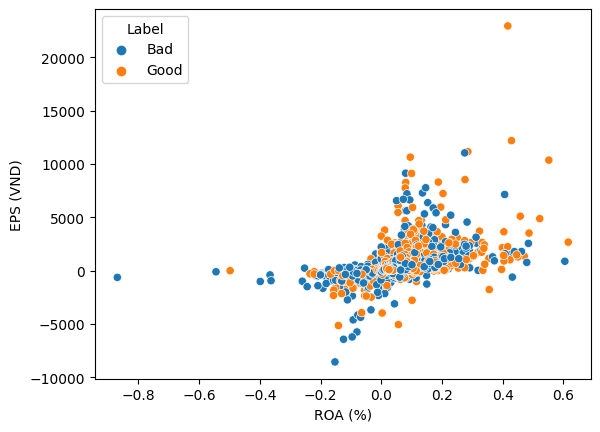

In [30]:
sns.scatterplot(x=df['ROA (%)'],y=df['EPS (VND)'], hue=df['Label'])

In [31]:
stats.spearmanr(df['ROA (%)'],df['EPS (VND)'])

SignificanceResult(statistic=0.7358752161568126, pvalue=0.0)

<Axes: xlabel='ROA (%)', ylabel='Gross Profit Margin (%)'>

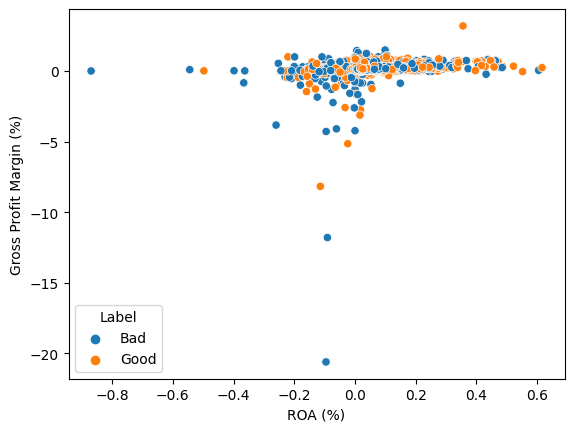

In [32]:
sns.scatterplot(x=df['ROA (%)'],y=df['Gross Profit Margin (%)'], hue=df['Label'])

In [33]:
stats.spearmanr(df['ROA (%)'],df['Gross Profit Margin (%)'])

SignificanceResult(statistic=0.4302708436818327, pvalue=1.3235604975482633e-217)

<Axes: xlabel='EPS (VND)', ylabel='Gross Profit Margin (%)'>

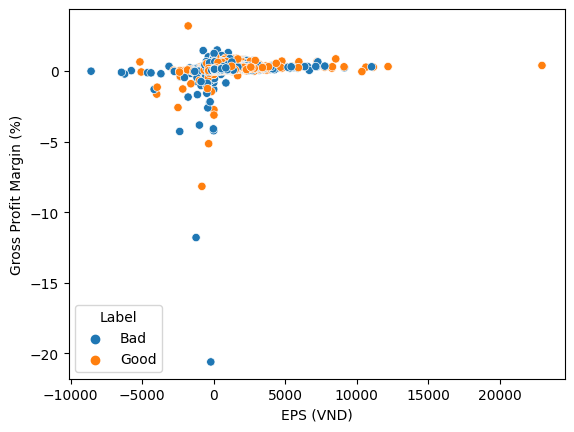

In [34]:
sns.scatterplot(x=df['EPS (VND)'],y=df['Gross Profit Margin (%)'], hue=df['Label'])

In [35]:
stats.spearmanr(df['EPS (VND)'],df['Gross Profit Margin (%)'])

SignificanceResult(statistic=0.4027092284638525, pvalue=2.3442710091539305e-188)

<Axes: xlabel='ROE (%)', ylabel='ROA (%)'>

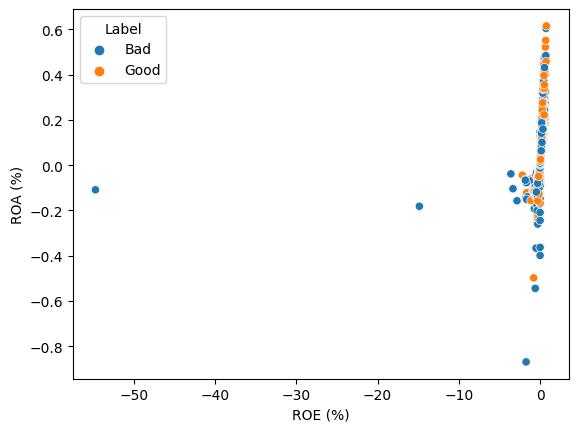

In [36]:
sns.scatterplot(x=df['ROE (%)'],y=df['ROA (%)'], hue=df['Label'])

In [37]:
stats.spearmanr(df['ROE (%)'],df['ROA (%)'])

SignificanceResult(statistic=0.9324587285126842, pvalue=0.0)

<Axes: xlabel='ROE (%)', ylabel='EPS (VND)'>

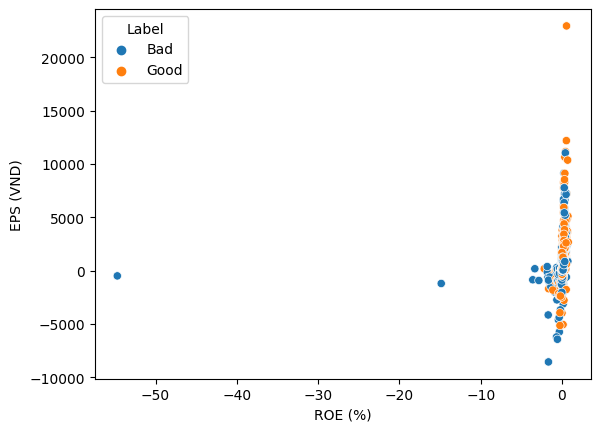

In [38]:
sns.scatterplot(x=df['ROE (%)'],y=df['EPS (VND)'], hue=df['Label'])

In [39]:
stats.spearmanr(df['ROE (%)'],df['EPS (VND)'])

SignificanceResult(statistic=0.770280856371619, pvalue=0.0)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler, normalize
X = df.loc[:,'Asset Turnover':'Debt/Equity']
y = df[['Label']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [41]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5612104539202201
0.5351851851851852
0.4275147928994083
0.4753289473684211


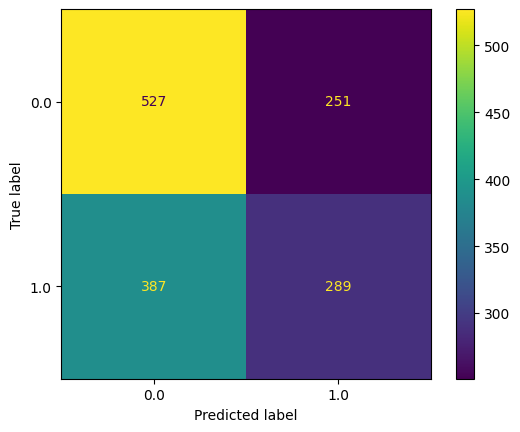

In [43]:
cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [71]:
RS = RobustScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = RS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
y_pred = clf1.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5612104539202201
0.5351851851851852
0.4275147928994083
0.4753289473684211


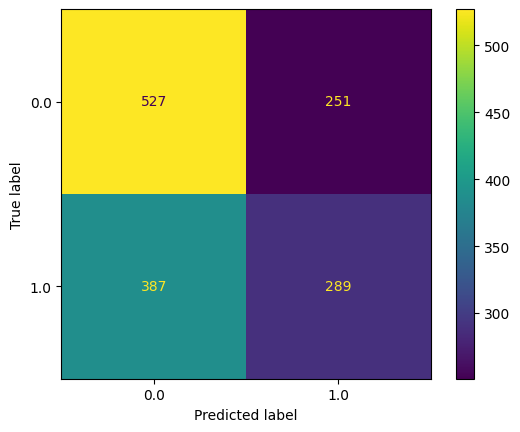

In [73]:
cm = confusion_matrix(y_test,y_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf1.classes_)
disp.plot()
plt.show()

In [74]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, random_state=0)

In [75]:
y_pred = clf2.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5584594222833562
0.583743842364532
0.33380281690140845
0.42473118279569894


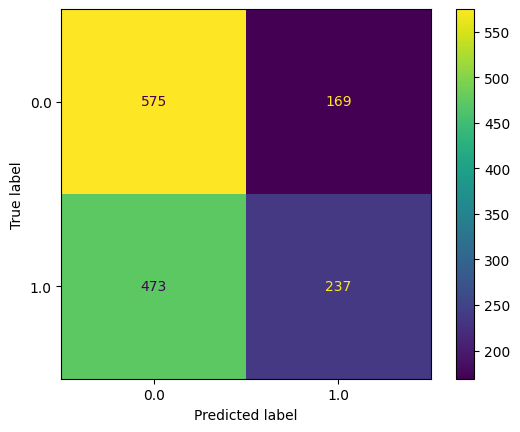

In [76]:
cm = confusion_matrix(y_test,y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf2.classes_)
disp.plot()
plt.show()

In [77]:
X = df.loc[:,'Asset Turnover':'Debt/Equity']
normalize(X, norm="l1")
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
y_pred = clf.predict(X_test) 
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, random_state=0)

In [78]:
y_pred = clf3.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5612104539202201
0.5351851851851852
0.4275147928994083
0.4753289473684211


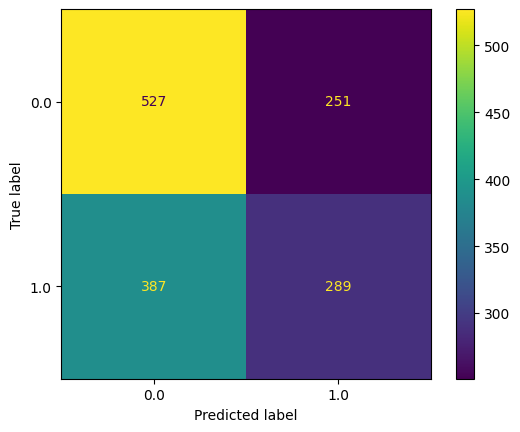

In [79]:
cm = confusion_matrix(y_test,y_pred, labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf3.classes_)
disp.plot()
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [81]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, n_jobs = 4) 
grid_search.fit(X_train, y_train.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [82]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [83]:
clf4 = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50,  random_state=0)
clf4.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50, random_state=0)

In [84]:
y_pred = clf4.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.578404401650619
0.5714285714285714
0.4412191582002903
0.497952497952498


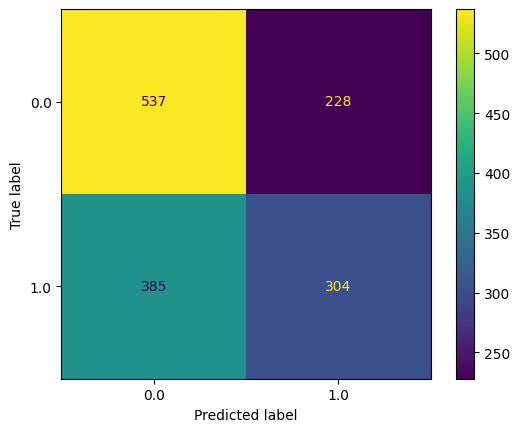

In [85]:
cm = confusion_matrix(y_test,y_pred, labels=clf4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf4.classes_)
disp.plot()
plt.show()

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
clf5.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [88]:
y_pred = clf5.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5584594222833562
0.5328596802841918
0.4418262150220913
0.4830917874396135


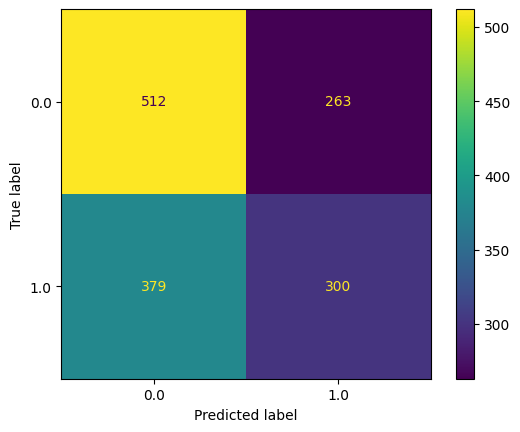

In [90]:
cm = confusion_matrix(y_test,y_pred, labels=clf5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf5.classes_)
disp.plot()
plt.show()

In [91]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf6 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf6.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [92]:
y_pred = clf6.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5859697386519945
0.5758157389635317
0.44052863436123346
0.49916805324459246


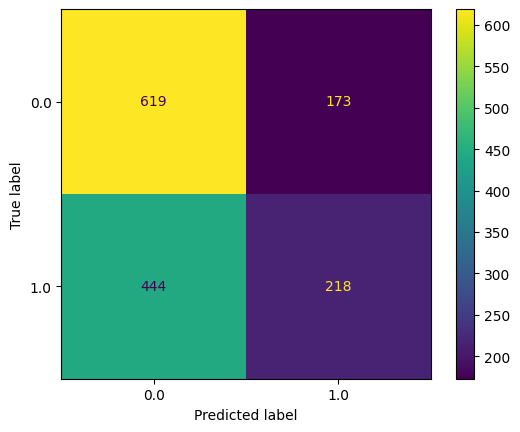

In [99]:
cm = confusion_matrix(y_test,y_pred, labels=clf6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf6.classes_)
disp.plot()
plt.show()

In [95]:
from sklearn.svm import SVC
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf7 = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0)
clf7.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


BaggingClassifier(estimator=SVC(), random_state=0)

In [96]:
y_pred = clf7.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5756533700137552
0.5575447570332481
0.3293051359516616
0.41405508072174735


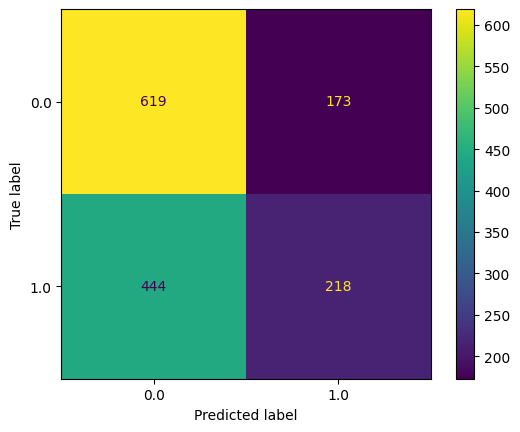

In [100]:
cm = confusion_matrix(y_test,y_pred, labels=clf7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf7.classes_)
disp.plot()
plt.show()

In [104]:
from sklearn.ensemble import StackingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
estimators = [
    ('bag', BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0)),
    ('ada', AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0))
]
clf8 = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50,  random_state=0)
)  
clf8.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


StackingClassifier(estimators=[('bag',
                                BaggingClassifier(estimator=SVC(),
                                                  random_state=0)),
                               ('ada',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   n_estimators=100,
                                                   random_state=0)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           random_state=0))],
                   final_estimator=RandomForestClassifier(max_depth=6,
                                                          max_features='log2',
                                                          max_leaf_nodes=9,
                                                          n_estimators=50,
                                                          random_state=0))

In [105]:
y_pred = clf8.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5735900962861072
0.563169164882227
0.3873343151693667
0.45898778359511344


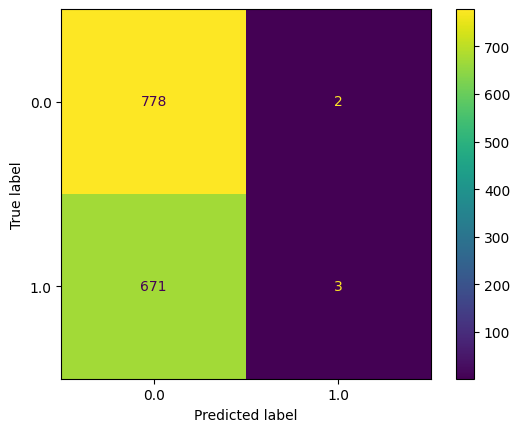

In [112]:
cm = confusion_matrix(y_test,y_pred, labels=clf8.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf8.classes_)
disp.plot()
plt.show()

In [134]:
from sklearn.neural_network import MLPClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf9 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 50), max_iter=10000, random_state=0)
clf9.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), max_iter=10000,
              random_state=0, solver='lbfgs')

In [135]:
y_pred = clf9.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5653370013755158
0.5524475524475524
0.3500738552437223
0.4285714285714286


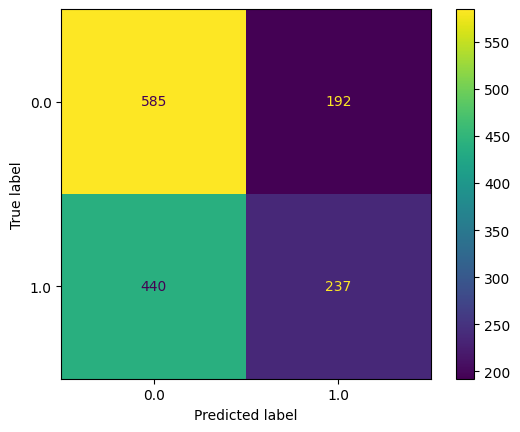

In [136]:
cm = confusion_matrix(y_test,y_pred, labels=clf9.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf9.classes_)
disp.plot()
plt.show()

In [154]:
from sklearn.ensemble import VotingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
eclf1 = VotingClassifier(estimators=[
        ('lr', clf4), ('rf', clf5), ('gnb', clf6), ('fdd',clf7)], voting='hard', weights=[2,1,1,1])
eclf1 = eclf1.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [155]:
y_pred = eclf1.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5811554332874828
0.5816733067729084
0.42257597684515197
0.48952221290863374


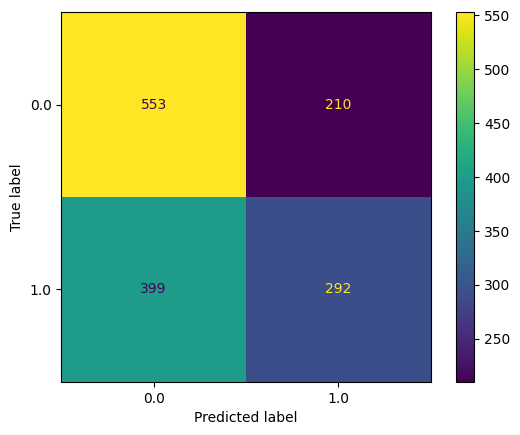

In [156]:
cm = confusion_matrix(y_test,y_pred, labels=eclf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=eclf1.classes_)
disp.plot()
plt.show()